# Exploring the Data

In [1]:
import sys
sys.path.append('../')

In [19]:
import matplotlib.pyplot as plt
import numpy as np
import torch

from utils import load_en_fr

In [3]:
dataset, EN, FR = load_en_fr(root='..', mini=False)

processing english...
[1/3] preprocessing
[2/3] building vocab
[3/3] processing
processing french...
[1/3] preprocessing
[2/3] building vocab
[3/3] processing
Processing took: 70.92m


In [4]:
print(f'Total # Examples: \t{len(dataset)}')
print(f'Total # English Tokens:\t{len(EN.vocab.stoi)}')
print(f'Total # French Tokens\t{len(FR.vocab.stoi)}')


Total # Examples: 	2007724
Total # English Tokens:	133955
Total # French Tokens	163855


## Sentence Lengths

In [20]:
pad_idx = EN.vocab.stoi[EN.pad_token]
quantile_keys = [0.25, 0.5, 0.75, 0.9, 0.95, 0.99, 0.999]

Longest Sentence:	881
Shortest Sentence:	1
Mean Sentence Length:	28.757727157716896


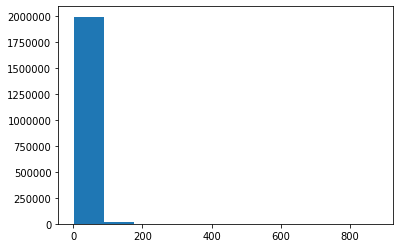

In [8]:
# Length of English Sentences. Note this includes eos token.

en_tensor = dataset.tensors[0]
en_mask = en_tensor != pad_idx
en_sample_lens = en_mask.sum(axis=1)
_ = plt.hist(en_sample_lens)

print(f'Longest Sentence:\t{en_sample_lens.max()}')
print(f'Shortest Sentence:\t{en_sample_lens.min()}')
print(f'Mean Sentence Length:\t{en_sample_lens.type(torch.DoubleTensor).mean()}')


In [21]:
en_sample_lens_np = en_sample_lens.numpy()
en_qs = {q:np.quantile(en_sample_lens_np, q) for q in quantile_keys}

for q, v in en_qs.items():
    print(f'Quantile {(q*100):.01f}%: {v}')


Quantile 25.0%: 17.0
Quantile 50.0%: 26.0
Quantile 75.0%: 37.0
Quantile 90.0%: 50.0
Quantile 95.0%: 59.0
Quantile 99.0%: 82.0
Quantile 99.9%: 121.0


Longest Sentence:	935
Shortest Sentence:	1
Mean Sentence Length:	31.82741352895119


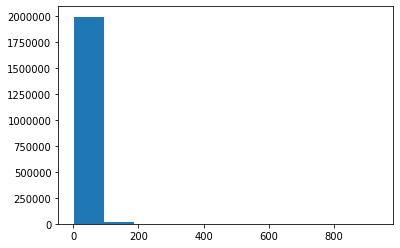

In [9]:
fr_tensor = dataset.tensors[1]
fr_mask = fr_tensor != pad_idx
fr_sample_lens = fr_mask.sum(axis=1)
_ = plt.hist(fr_sample_lens)

print(f'Longest Sentence:\t{fr_sample_lens.max()}')
print(f'Shortest Sentence:\t{fr_sample_lens.min()}')
print(f'Mean Sentence Length:\t{fr_sample_lens.type(torch.DoubleTensor).mean()}')


In [22]:
fr_sample_lens_np = fr_sample_lens.numpy()
fr_qs = {q:np.quantile(fr_sample_lens_np, q) for q in quantile_keys}

for q, v in fr_qs.items():
    print(f'Quantile {(q*100):.01f}%: {v}')


Quantile 25.0%: 19.0
Quantile 50.0%: 28.0
Quantile 75.0%: 41.0
Quantile 90.0%: 55.0
Quantile 95.0%: 66.0
Quantile 99.0%: 91.0
Quantile 99.9%: 135.0
